In [30]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('Expanded_data_with_more_features.csv')

In [49]:
df.head()

,Gender,TestPrep,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,1,0,0.0,71,71,74
1,1,0,1.0,69,90,88
2,1,0,0.0,87,93,91
3,0,0,1.0,45,56,42
4,0,0,1.0,76,78,75


In [33]:
#Mapear df.Gender a 0 y 1
df.Gender = df['Gender'].map({'male':0,'female':1})

In [34]:
#Dropeo las columnas que no me interesan
df.drop(['ParentMaritalStatus','PracticeSport','EthnicGroup','ParentEduc','TransportMeans'], axis=1, inplace=True)

In [35]:
#Dropeo Unnamed:0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
#Convierto en none los valores nulos en none
df.TestPrep = df['TestPrep'].fillna('none')

In [37]:
#Mapeo none:0, completed:1
df.TestPrep = df['TestPrep'].map({'none':0,'completed':1})

In [38]:
#Mapeo los valores de LunchType a 0 y 1:
df.LunchType = df['LunchType'].map({'free/reduced':0,'standard':1})

In [39]:
#Dropeo columnas que no me interesan
df.drop(['IsFirstChild','NrSiblings'], axis=1, inplace=True)

In [40]:
#Mapear los valores de WklyStudyHours #< 5:0, 5 - 10:1, > 10:2
df.WklyStudyHours = df['WklyStudyHours'].map({'< 5':0,'5 - 10':1,'> 10':2})


In [41]:
#Colocar media a los valores nulos de WklyStudyHours
df.WklyStudyHours = df['WklyStudyHours'].fillna(df['WklyStudyHours'].mean())

In [42]:
#dropeo LunchType
df.drop(['LunchType'], axis=1, inplace=True)

In [79]:
df_to_practice = df.drop(['TestPrep','ReadingScore','WritingScore'],axis=1)

In [80]:
centers = range(1, 9)

In [81]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [82]:
scores = [model.fit(df_to_practice).score(df_to_practice) for model in clusters]

c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

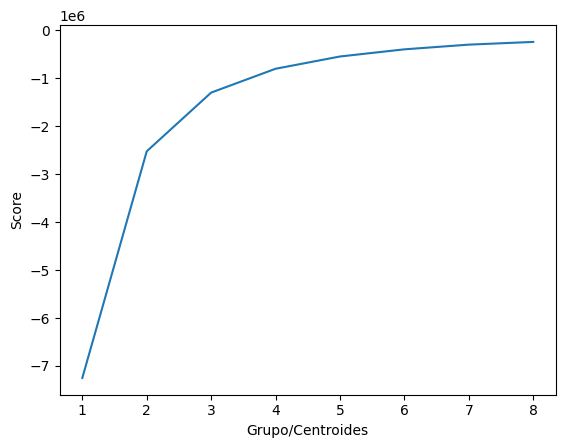

In [83]:
# Aplicamos la curva de Elbow
plt.plot(centers, scores)
plt.xlabel('Grupo/Centroides')
plt.ylabel('Score')
plt.show()

In [84]:
k_means = KMeans(n_clusters=4)

In [85]:
k_means.fit(df_to_practice)

c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [86]:
k_means.cluster_centers_

array([[ 0.54943003,  0.85909142, 58.31230346],
       [ 0.47200464,  0.90605475, 72.69451697],
       [ 0.39028533,  0.99672106, 88.03549592],
       [ 0.62653447,  0.83262787, 41.53517469]])

In [87]:
k_means.labels_

array([1, 1, 2, ..., 0, 2, 0])

In [102]:
# Esta es la parte dificil del practico supuestamente
customer_groups = [
    'Estudiante Promedio, debe esforzarse mas',
    'Estudiante Bueno y con posibilidades de ser becado',
    'Estudiante Excelente y con posibilidades de ser becado',
    'Estudiante Aplazado, necesita ayuda'
]

In [99]:
Gender = 0
WklyStudyHours =0
MathScore =30
predicted = k_means.predict([[Gender, WklyStudyHours, MathScore]])
print(f'Un estudiante de genero {Gender}, estudia {WklyStudyHours}   y saco  {MathScore} en el examen de matematicas es un  {customer_groups[predicted[0]]}')

Un estudiante de genero 0, estudia 0   y saco  30 en el examen de matematicas es un  Estudiante Aplazado


c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [110]:
Gender = 1
WklyStudyHours = 0
MathScore = 80
predicted = k_means.predict([[Gender, WklyStudyHours, MathScore]])
gender_label = 'masculino' if Gender == 0 else 'femenino'
study_hours_label = '< 5 horas' if WklyStudyHours == 0 else '> 5 horas'
print(f"Un estudiante de genero {gender_label}, estudia {study_hours_label} y sacó {MathScore} en el examen de matemáticas es un {customer_groups[predicted[0]]}")


Un estudiante de genero femenino, estudia < 5 horas y sacó 80 en el examen de matemáticas es un Estudiante Bueno y con posibilidades de ser becado


c:\Users\marit\OneDrive\Escritorio\practico_keymeans\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
